### РГР №2, Ахметшин Б.Р. 303Б, Вариант №2:

**Дано**

$$x(t) = t^{n - 1}$$
$$\int_0^{1,1}{x(t)y(t)(6 - t)}dt$$

**Ортогонализация системы функций**

**1. Заданные параметры**

- Интервал: $ [a, b] = [0, 1.1] $
- Весовая функция: $ f(t) = 6 - t $
- Базисные функции: $ x_n(t) = t^{n-1} $, то есть
  $$
  x_0 = 1, \quad x_1 = t, \quad x_2 = t^2, \quad x_3 = t^3
  $$


In [40]:
import sympy as sp

# Определяем переменные
t = sp.Symbol('t')
n = sp.Symbol('n', integer=True)

# Границы интегрирования
a, b = 0, 1.1

# Весовая функция
f_t = 6 - t

# Функции системы
x_n = t**(n-1)

# Скалярное произведение
inner_product = sp.integrate(x_n * x_n * f_t, (t, a, b))
inner_product.simplify()

Piecewise(((-1.1*1.21**n - oo*n**2 + oo*n)/(n*(8.8*n**2 - 8.8*n + 2.2)), (n > 0) | (n < 0)), (oo, True))

In [41]:
# Ортогонализация методом Грама-Шмидта
def gram_schmidt(functions, weight, interval):
    ortho_funcs = []
    for i, f in enumerate(functions):
        # Проекция на уже найденные ортогональные функции
        proj = sum(sp.integrate(f * g * f_t, (t, *interval)) / 
                   sp.integrate(g * g * f_t, (t, *interval)) * g for g in ortho_funcs)
        # Новая ортогональная функция
        new_f = f - proj
        ortho_funcs.append(sp.simplify(new_f))
    return ortho_funcs

# Генерация первых нескольких полиномов
num_funcs = 6  # Количество функций в системе
basis_functions = [t**(i) for i in range(num_funcs)]

# Ортогональные функции
ortho_basis = gram_schmidt(basis_functions, f_t, (a, b))
ortho_basis


[1,
 t - 0.531498470948012,
 t**2 - 1.08514835876358*t + 0.193773042058443,
 t**3 - 1.63568839171424*t**2 + 0.710469781757439*t - 0.0637767961257195,
 t**4 - 2.1858664825331*t**3 + 1.53259625525959*t**2 - 0.370244277215553*t + 0.0200143238236913,
 t**5 - 2.73594724707629*t**4 + 2.65817144728468*t**3 - 1.08762947015815*t**2 + 0.169094667697821*t - 0.00610965635072407]

**Разложение функции $ y(t) = \cos(2t) $ в ортогональном базисе**


1. **Формула разложения**
Разложение Фурье имеет вид:
$$
y(t) \approx c_0 \varphi_0(t) + c_1 \varphi_1(t) + c_2 \varphi_2(t) + c_3 \varphi_3(t)
$$
где коэффициенты Фурье вычисляются по формуле:
$$
c_n = \frac{\langle y, \varphi_n \rangle}{\langle \varphi_n, \varphi_n \rangle}
$$
где скалярное произведение задано как
$$
\langle f, g \rangle = \int_0^{1.1} f(t) g(t) (6 - t) dt
$$


In [42]:
# Функция, которую аппроксимируем
y_t = sp.cos(2*t)

# Вычисление коэффициентов Фурье
fourier_coeffs = [
    sp.integrate(y_t * phi * f_t, (t, a, b)) / sp.integrate(phi * phi * f_t, (t, a, b))
    for phi in ortho_basis
]

# Частичные суммы ряда Фурье
fourier_approx = sum(c * phi for c, phi in zip(fourier_coeffs, ortho_basis))
S_t = fourier_approx
S_t.simplify()

-0.226273136041962*t**5 + 0.908406157207633*t**4 - 0.127403466074852*t**3 - 1.96764795031513*t**2 - 0.00333920660253985*t + 1.00008280606882

**Рассчитаем среднеквадратичную точность разложения**

In [43]:
# Вычисление ошибки
error_integrand = (y_t - S_t)**2 * f_t
error = sp.sqrt(sp.integrate(error_integrand, (t, 0, 1.1)))

# Проверка условия точности
error_value = error.evalf()
print(f'Ошибка E_N: {error_value}')
print(f'Точность удовлетворяет условию: {error_value < 1e-3}')

Ошибка E_N: 0.0000513470404115890
Точность удовлетворяет условию: True


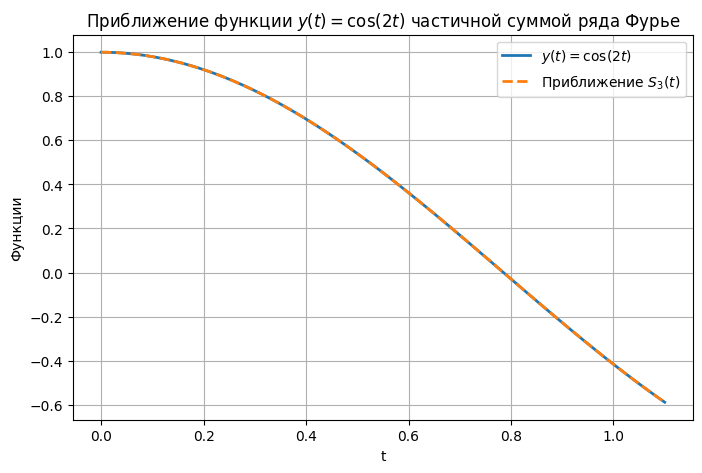

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию y(t) и её приближение
t_values = np.linspace(0, 1.1, 100)
y_values = np.cos(2 * t_values)
S_t_numeric = sp.lambdify(t, S_t, modules=["numpy"])
approx_values = S_t_numeric(t_values)

# Строим графики
plt.figure(figsize=(8, 5))
plt.plot(t_values, y_values, label=r"$y(t) = \cos(2t)$", linewidth=2)
plt.plot(t_values, approx_values, label=r"Приближение $S_3(t)$", linestyle="dashed", linewidth=2)
plt.xlabel("t")
plt.ylabel("Функции")
plt.legend()
plt.title("Приближение функции $y(t) = \cos(2t)$ частичной суммой ряда Фурье")
plt.grid()
plt.show()
